# <center> Trabalho Prático 2 - Aprendizado de Máquina</center>
## <center>Universidade Federal de Minas Gerais</center>
## <center>Ramon Gonçalves Gonze</center>

Tempo de execução aproximado utilizando o *Google Colab*: 1 hora e 5 minutos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import to_categorical

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

%matplotlib inline

Using TensorFlow backend.


## Funções para plots

In [0]:
def plotG(history, title, n):
  plt.subplot(2,2,n)
  plt.plot(np.arange(1,21), history.history['acc'], label='Training acc', color='royalblue')
  plt.plot(np.arange(1,21), history.history['val_acc'], label='Validation acc', color='green')
  plt.scatter(20,history.history['acc'][-1], color='royalblue')
  plt.scatter(20,history.history['val_acc'][-1], color='green')  
  plt.text(20-1,history.history['acc'][-1]+y1[n-1], '%.3f'%(history.history['acc'][-1]))
  plt.text(20-1,history.history['val_acc'][-1]+y2[n-1], '%.3f'%(history.history['val_acc'][-1]))
  plt.xlim(0,21)
  plt.ylim(0,1)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(title)
  plt.grid(alpha=0.5)
  plt.legend(loc='lower right', fontsize=12)
  
def plotLA(history, title):
  plt.figure(figsize=(14,6.5))
  plt.subplot(1,2,1)
  plt.plot(np.arange(1,21), history.history['acc'], label='Training acc', color='royalblue')
  plt.plot(np.arange(1,21), history.history['loss'], label='Training loss', color='red')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy/Loss')
  plt.title(title[0])
  plt.grid(alpha=0.5)
  plt.legend(fontsize=12)
  
  plt.subplot(1,2,2)
  plt.plot(np.arange(1,21), history.history['val_acc'], label='Validation acc', color='royalblue')
  plt.plot(np.arange(1,21), history.history['val_loss'], label='Validation loss', color='red')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy/Loss')
  plt.title(title[1])
  plt.grid(alpha=0.5)
  plt.legend(fontsize=12)
  
  plt.show()

---
# <center> Tratamento da base de dados</center>
---

In [4]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
"""
  Separação da base de dados em dois conjuntos A e B, onde:
    - A: Contém imagens das classes de 0,2,3,4,5,6,7,9
    - B: Contém imagens das classes 1 e 8
    
    OBS.: Matrícula = 2016058581
"""

A_xTrain = np.array([xTrain[i] for i in np.arange(len(yTrain)) if yTrain[i] != 1 and yTrain[i] != 8])
A_yTrain = np.array([yTrain[i] for i in np.arange(len(yTrain)) if yTrain[i] != 1 and yTrain[i] != 8])
A_xTest = np.array([xTest[i] for i in np.arange(len(yTest)) if yTest[i] != 1 and yTest[i] != 8])
A_yTest = np.array([yTest[i] for i in np.arange(len(yTest)) if yTest[i] != 1 and yTest[i] != 8])

B_xTrain = np.array([xTrain[i] for i in np.arange(len(yTrain)) if yTrain[i] == 1 or yTrain[i] == 8])
B_yTrain = np.array([yTrain[i] for i in np.arange(len(yTrain)) if yTrain[i] == 1 or yTrain[i] == 8])
B_xTest = np.array([xTest[i] for i in np.arange(len(yTest)) if yTest[i] == 1 or yTest[i] == 8])
B_yTest = np.array([yTest[i] for i in np.arange(len(yTest)) if yTest[i] == 1 or yTest[i] == 8])

num_classes = len(set(map(lambda x : x[0], yTrain)))
imgShapeA = A_xTrain[0].shape
imgShapeB = B_xTrain[0].shape

# One-Hot encoding
A_yTrain = to_categorical(A_yTrain, num_classes=num_classes)
A_yTest = to_categorical(A_yTest, num_classes=num_classes)
B_yTrain = to_categorical(B_yTrain, num_classes=num_classes)
B_yTest = to_categorical(B_yTest, num_classes=num_classes)

In [6]:
A_yTrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

---
# <center> Treinamento no conjunto A</center>
---

In [0]:
modelA = Sequential()
DROPOUT1 = 0.25

####### Extração de Features #######
modelA.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeA, name='conv1'))
modelA.add(Dropout(DROPOUT1, name='drop1'))
modelA.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeA, name='conv2'))
modelA.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
modelA.add(Dropout(DROPOUT1, name='drop2'))
modelA.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeA, name='conv3'))
modelA.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))
modelA.add(Dropout(DROPOUT1, name='drop3'))
modelA.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeA, name='conv4'))

########### Classificação ##########
modelA.add(Flatten(name='flat1'))
modelA.add(Dense(128, activation='relu', name='dense1'))
modelA.add(Dropout(DROPOUT1, name='drop4'))
modelA.add(Dense(num_classes, activation='softmax', name='dense2'))

# Compilação do modelo
modelA.compile(keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
EPOCHS1 = 20
history_modelA = modelA.fit(A_xTrain, A_yTrain, epochs=EPOCHS1, verbose=1, validation_data=(A_xTest, A_yTest))

Train on 40000 samples, validate on 8000 samples
Epoch 1/20
40000/40000 [==============================] - 174s 4ms/step - loss: 10.1336 - acc: 0.1648 - val_loss: 2.0728 - val_acc: 0.2328
Epoch 2/20
40000/40000 [==============================] - 171s 4ms/step - loss: 1.9840 - acc: 0.2486 - val_loss: 1.8613 - val_acc: 0.3583
Epoch 3/20
40000/40000 [==============================] - 172s 4ms/step - loss: 1.8020 - acc: 0.3227 - val_loss: 1.7181 - val_acc: 0.4005
Epoch 4/20
40000/40000 [==============================] - 174s 4ms/step - loss: 1.6851 - acc: 0.3703 - val_loss: 1.6442 - val_acc: 0.4250
Epoch 5/20
40000/40000 [==============================] - 175s 4ms/step - loss: 1.5948 - acc: 0.4050 - val_loss: 1.5409 - val_acc: 0.4559
Epoch 6/20
40000/40000 [==============================] - 175s 4ms/step - loss: 1.5187 - acc: 0.4352 - val_loss: 1.4510 - val_acc: 0.4910
Epoch 7/20
40000/40000 [==============================] - 173s 4ms/step - loss: 1.4550 - acc: 0.4608 - val_loss: 1.4193 - 

In [0]:
modelA.save_weights('weights_modelA.h5')

---
# <center> Estratégias utilizando o conjunto B</center>
---

## Sem *Transfer Learning*

In [0]:
modelB1 = Sequential()
DROPOUT2 = 0.25

####### Extração de Features #######
modelB1.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv1'))
modelB1.add(Dropout(DROPOUT2, name='drop1'))
modelB1.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv2'))
modelB1.add(MaxPooling2D(pool_size=(2, 2), name='pool1'))
modelB1.add(Dropout(DROPOUT2, name='drop2'))
modelB1.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv3'))
modelB1.add(MaxPooling2D(pool_size=(2, 2), name='pool2'))
modelB1.add(Dropout(DROPOUT2, name='drop3'))
modelB1.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv4'))

########### Classificação ##########
modelB1.add(Flatten(name='flat1'))
modelB1.add(Dense(128, activation='relu', name='dense1'))
modelB1.add(Dropout(DROPOUT2, name='drop4'))
modelB1.add(Dense(num_classes, activation='softmax', name='dense2'))

# Compilação do modelo
modelB1.compile(keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
EPOCHS2 = 20
history_modelB1 = modelB1.fit(B_xTrain, B_yTrain, epochs=EPOCHS2, verbose=1, validation_data=(B_xTest, B_yTest))

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
10000/10000 [==============================] - 45s 5ms/step - loss: 3.6450 - acc: 0.6072 - val_loss: 0.6208 - val_acc: 0.6880
Epoch 2/20
10000/10000 [==============================] - 44s 4ms/step - loss: 0.6596 - acc: 0.7210 - val_loss: 0.5949 - val_acc: 0.6780
Epoch 3/20
10000/10000 [==============================] - 44s 4ms/step - loss: 0.5017 - acc: 0.7737 - val_loss: 0.5504 - val_acc: 0.6955
Epoch 4/20
10000/10000 [==============================] - 44s 4ms/step - loss: 0.4424 - acc: 0.8051 - val_loss: 0.4812 - val_acc: 0.7495
Epoch 5/20
10000/10000 [==============================] - 44s 4ms/step - loss: 0.3996 - acc: 0.8209 - val_loss: 0.4247 - val_acc: 0.8130
Epoch 6/20
10000/10000 [==============================] - 44s 4ms/step - loss: 0.3788 - acc: 0.8385 - val_loss: 0.3839 - val_acc: 0.8545
Epoch 7/20
10000/10000 [==============================] - 44s 4ms/step - loss: 0.3587 - acc: 0.8457 - val_loss: 0.3827 - val_acc:

## *Fine-tuning* em uma camada

In [0]:
modelB2 = Sequential()
DROPOUT3 = 0.25

"""
  O parâmetro 'trainable=False' faz com que a camada 'congele', ou seja,
  serão utilizados somente os pesos do Primeiro modelo treinado.
"""

####### Extração de Features #######
modelB2.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv1', trainable=False))
modelB2.add(Dropout(DROPOUT3, name='drop1', trainable=False))
modelB2.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv2', trainable=False))
modelB2.add(MaxPooling2D(pool_size=(2, 2), name='pool1', trainable=False))
modelB2.add(Dropout(DROPOUT3, name='drop2', trainable=False))
modelB2.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv3', trainable=False))
modelB2.add(MaxPooling2D(pool_size=(2, 2), name='pool2', trainable=False))
modelB2.add(Dropout(DROPOUT3, name='drop3', trainable=False))
modelB2.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv4', trainable=False))

########### Classificação ##########
modelB2.add(Flatten(name='flat1', trainable=False))
modelB2.add(Dense(128, activation='relu', name='dense1', trainable=False))
modelB2.add(Dropout(DROPOUT3, name='drop4', trainable=False))
modelB2.add(Dense(num_classes, activation='softmax', name='new_dense2'))

########## Carrega os pesos ########
modelB2.load_weights('weights_modelA.h5', by_name=True)

# Compilação do modelo
modelB2.compile(keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
EPOCHS3 = 20
history_modelB2 = modelB2.fit(B_xTrain, B_yTrain, epochs=EPOCHS3, verbose=1, validation_data=(B_xTest, B_yTest))

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
10000/10000 [==============================] - 16s 2ms/step - loss: 4.1709 - acc: 0.1112 - val_loss: 2.0751 - val_acc: 0.3235
Epoch 2/20
10000/10000 [==============================] - 15s 1ms/step - loss: 2.2230 - acc: 0.3479 - val_loss: 1.1981 - val_acc: 0.5840
Epoch 3/20
10000/10000 [==============================] - 15s 1ms/step - loss: 1.3197 - acc: 0.5377 - val_loss: 0.8215 - val_acc: 0.7215
Epoch 4/20
10000/10000 [==============================] - 15s 1ms/step - loss: 0.9387 - acc: 0.6466 - val_loss: 0.6605 - val_acc: 0.7700
Epoch 5/20
10000/10000 [==============================] - 15s 1ms/step - loss: 0.7741 - acc: 0.7082 - val_loss: 0.5775 - val_acc: 0.7985
Epoch 6/20
10000/10000 [==============================] - 15s 1ms/step - loss: 0.6559 - acc: 0.7457 - val_loss: 0.5271 - val_acc: 0.8110
Epoch 7/20
10000/10000 [==============================] - 15s 1ms/step - loss: 0.6088 - acc: 0.7566 - val_loss: 0.4925 - val_acc:

## *Fine-tuning* em duas camadas

In [0]:
modelB3 = Sequential()
DROPOUT4 = 0.25

"""
  O parâmetro 'trainable=False' faz com que a camada 'congele', ou seja,
  serão utilizados somente os pesos do Primeiro modelo treinado.
"""

####### Extração de Features #######
modelB3.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv1', trainable=False))
modelB3.add(Dropout(DROPOUT4, name='drop1', trainable=False))
modelB3.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv2', trainable=False))
modelB3.add(MaxPooling2D(pool_size=(2, 2), name='pool1', trainable=False))
modelB3.add(Dropout(DROPOUT4, name='drop2', trainable=False))
modelB3.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv3', trainable=False))
modelB3.add(MaxPooling2D(pool_size=(2, 2), name='pool2', trainable=False))
modelB3.add(Dropout(DROPOUT4, name='drop3', trainable=False))
modelB3.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=imgShapeB, name='conv4', trainable=False))

########### Classificação ##########
modelB3.add(Flatten(name='flat1'))
modelB3.add(Dense(128, activation='relu', name='new_dense1'))
modelB3.add(Dropout(DROPOUT4, name='drop4'))
modelB3.add(Dense(num_classes, activation='softmax', name='new_dense2'))

########## Carrega os pesos ########
modelB3.load_weights('weights_modelA.h5', by_name=True)

# Compilação do modelo
modelB3.compile(keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
EPOCHS4 = 20
history_modelB3 = modelB3.fit(B_xTrain, B_yTrain, epochs=EPOCHS4, verbose=1, validation_data=(B_xTest, B_yTest))

Train on 10000 samples, validate on 2000 samples
Epoch 1/20
10000/10000 [==============================] - 19s 2ms/step - loss: 0.5561 - acc: 0.8010 - val_loss: 0.3020 - val_acc: 0.8885
Epoch 2/20
10000/10000 [==============================] - 17s 2ms/step - loss: 0.3163 - acc: 0.8738 - val_loss: 0.2696 - val_acc: 0.9000
Epoch 3/20
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2792 - acc: 0.8899 - val_loss: 0.2549 - val_acc: 0.9075
Epoch 4/20
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2528 - acc: 0.8998 - val_loss: 0.2400 - val_acc: 0.9105
Epoch 5/20
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2438 - acc: 0.9042 - val_loss: 0.2353 - val_acc: 0.9105
Epoch 6/20
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2260 - acc: 0.9133 - val_loss: 0.2196 - val_acc: 0.9160
Epoch 7/20
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2160 - acc: 0.9148 - val_loss: 0.2191 - val_acc:


---
# <center> Comparação dos resultados </center>
---

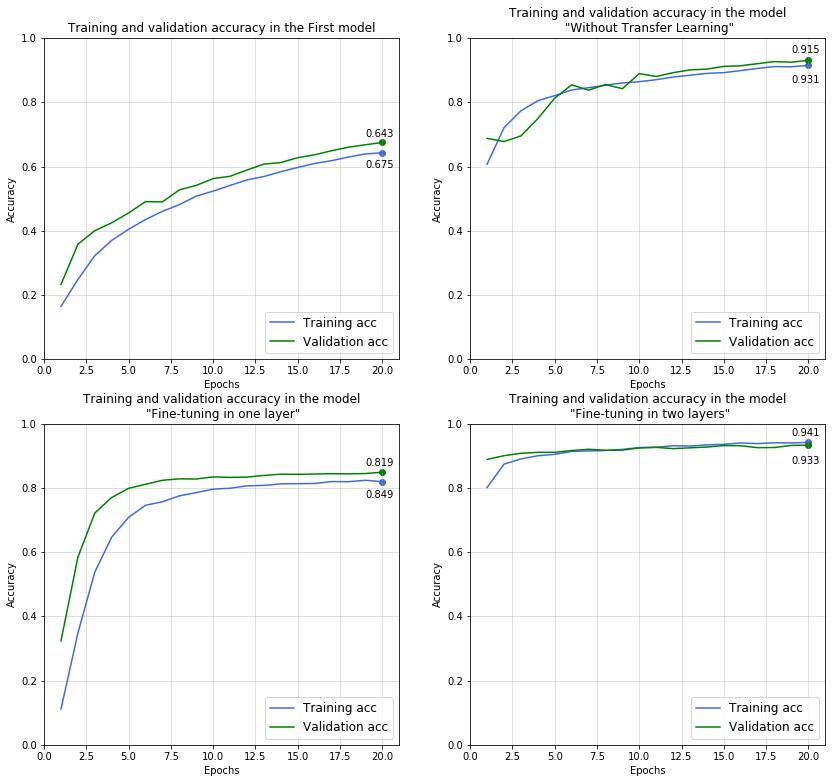

In [0]:
plt.figure(figsize=(14,13))
y1 = [0.05, 0.04, 0.05, 0.02]
y2 = [-0.08, -0.07, -0.08, -0.06]
  
plotG(history_modelA, 'Training and validation accuracy in the First model', 1)
plotG(history_modelB1, 'Training and validation accuracy in the model\n "Without Transfer Learning"', 2)
plotG(history_modelB2, 'Training and validation accuracy in the model\n "Fine-tuning in one layer"', 3)
plotG(history_modelB3, 'Training and validation accuracy in the model\n "Fine-tuning in two layers"', 4)

Pode ser observador nos gráficos acima que a acurácia alcançada na validação é quase sempre superior à acurárcia do treino nos quatro modelos. 
- No primeiro modelo, observamos uma curva semelhante à logarítmica, e a acurácia máxima ao final de 20 épocas é de **64,3%**.
- No modelo "Sem Tranfer Learning" a acurácia do treino é superior à da validação até a 5ª epóca, e a partir da 6ª epóca isto se inverte. A acurácia alcançada ao final de 20 épocas é de **91,5%**.
- No modelo "Fine-tuning em uma camada" podemos observar uma melhora bem significativa da acurácia até a 7ª epóca, e a partir da 8ª época, o modelo começa a convergir, alcançando **81,9%** de acurácia na 20ª época.
- No modelo "Fine-tuning em duas camadas" podemos observar que logo na 1ª época a acurácia já é alta (em torno de 80%). O modelo consegue alcançar uma acurácia de **94,1%** na última época.

A partir da análise acima podemos concluir que o modelo "Fine-tuning em duas camadas" obteve o melhor resultado para classificar os exemplos do grupo B.

---

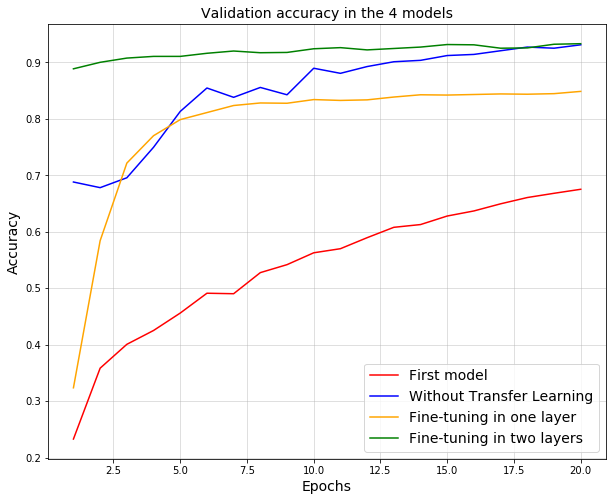

In [0]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,21), history_modelA.history['val_acc'], label='First model', color='red')
plt.plot(np.arange(1,21), history_modelB1.history['val_acc'], label='Without Transfer Learning', color='blue')
plt.plot(np.arange(1,21), history_modelB2.history['val_acc'], label='Fine-tuning in one layer', color='orange')
plt.plot(np.arange(1,21), history_modelB3.history['val_acc'], label='Fine-tuning in two layers', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Validation accuracy in the 4 models', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=14)

O gráfico acima permite-nos ver a convergência gradual do Primeiro modelo e do modelo "Sem Transfer Learning" em comparação com os modelos de Fine-tuning. O Primeiro modelo e o modelo "Sem Transfer Learning" precisam aprender os pesos a partir do treino, o que ocorrre ao longo das épocas, enquanto que os modelos de Fine-tuning já recebem estes pesos inicialmente, conseguindo assim uma convergência rápida já nas primeiras épocas.

---

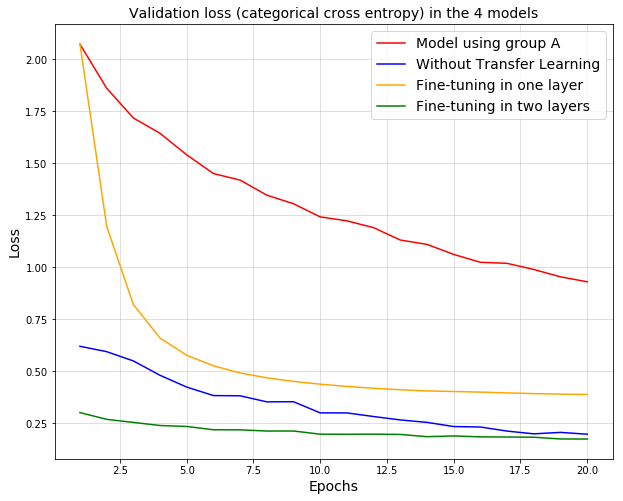

In [0]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,21), history_modelA.history['val_loss'], label='Model using group A', color='red')
plt.plot(np.arange(1,21), history_modelB1.history['val_loss'], label='Without Transfer Learning', color='blue')
plt.plot(np.arange(1,21), history_modelB2.history['val_loss'], label='Fine-tuning in one layer', color='orange')
plt.plot(np.arange(1,21), history_modelB3.history['val_loss'], label='Fine-tuning in two layers', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Validation loss (categorical cross entropy) in the 4 models', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=14)

A partir do gráfico acima podemos observar novamente a convergência gradual do Primeiro modelo e do modelo "Sem Transfer Learning" em comparação com os modelos de Fine-Tuning.

---
# <center>Acurácia x Perda</center>
---

A função de perda utilizada para analisar os modelos foi a *Loss cross-entropy*.

---

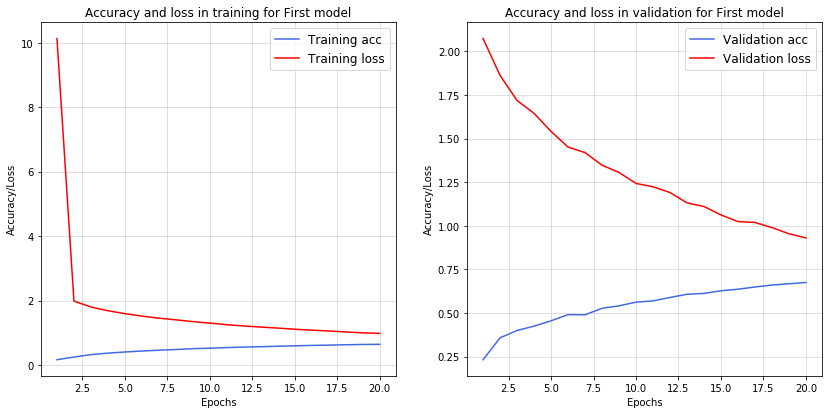

In [0]:
plotLA(history_modelA, ['Accuracy and loss in training for First model', 'Accuracy and loss in validation for First model'])

Para o Primeiro modelo, podemos observar uma rápida queda na perda após a 2ª época (gráfico da esquerda).
Já o gráfico da direita, nos mostra uma lenta convergência do modelo, com a acurácia subindo e a perda diminuindo ao passar das épocas. De certo modo é intuitivo que isso ocorra, pois os pesos foram iniciados aleatóriamente e o modelo atualiza os pesos conforme as épocas vão passando.

---

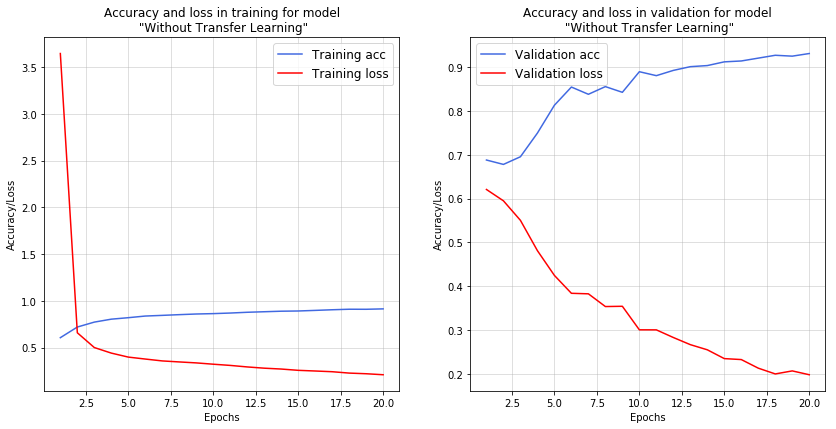

In [0]:
plotLA(history_modelB1, ['Accuracy and loss in training for model\n "Without Transfer Learning"', 'Accuracy and loss in validation for model\n "Without Transfer Learning"'])

Logo após a 2ª época, podemos observar que o valor da acurácia já ultrapassa a perda (gráfico da esquerda). O comportamento é diferente do gráfico do *Primeiro modelo*, e isto pode ser explicado pelo fato de que o Primeiro modelo possui 8 classes distintas na base de dados (grupo A) enquanto que o modelo "Sem Transfer Learning" possui somente 2 classes distintas na base de dados (grupo B).

O gráfico da direita nos mostra uma convergência gradual ao passar das épocas, devido ao fato de os pesos iniciais serem aleatórios.

---

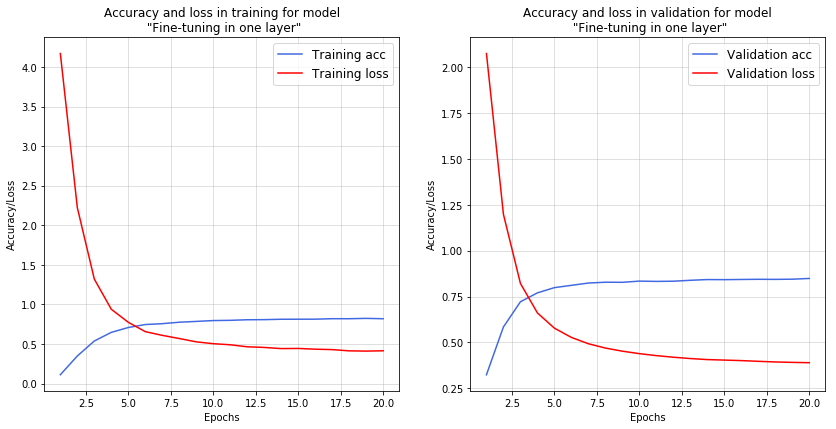

In [0]:
plotLA(history_modelB2, ['Accuracy and loss in training for model\n "Fine-tuning in one layer"', 'Accuracy and loss in validation for model\n "Fine-tuning in one layer"'])

Diferente do Primeiro modelo e do modelo "Sem Transfer Learning", o modelo "Fine-tuning em uma camada" possui uma convergência rápida já nas primeiras épocas. Isto pode ser explicado pelo fato de os pesos iniciais não serem aleatórios, isto é, eles já estão "treinados" pelo Primeiro modelo.

---

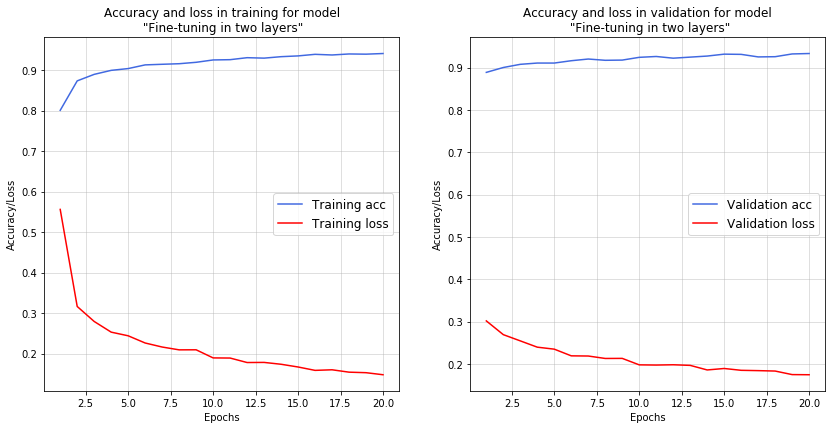

In [0]:
plotLA(history_modelB3, ['Accuracy and loss in training for model\n "Fine-tuning in two layers"', 'Accuracy and loss in validation for model\n "Fine-tuning in two layers"'])

Por último, o modelo "Fine-tuning em duas camadas" também mostra o mesmo comportamento do modelo "Fine-tuning em uma camada": convergência rápida nas primeiras épocas. Porém, a acurácia obtida é maior e a perda alcançada pelo modelo é menor.

---